# House Price Prediction on Boston Data using Linear Regression

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import model_selection
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# Load the Dataset

In [2]:
boston = datasets.load_boston()

In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
features = boston.feature_names
print(features)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
Desc = boston.DESCR
print(Desc)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
X = boston.data
print(X)
print(X.shape)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
(506, 13)


In [7]:
Y = boston.target
print(Y)
print(Y.shape)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

# Analyse the Dataset

In [8]:
df = pd.DataFrame(X)
df.columns = features
df['target'] = Y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

<AxesSubplot:xlabel='CHAS', ylabel='count'>

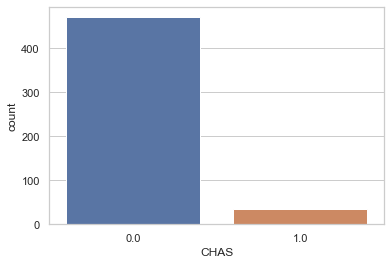

In [11]:
sns.set_theme(style="whitegrid")
sns.countplot(x = 'CHAS' , data = df)

# Histogram for every features

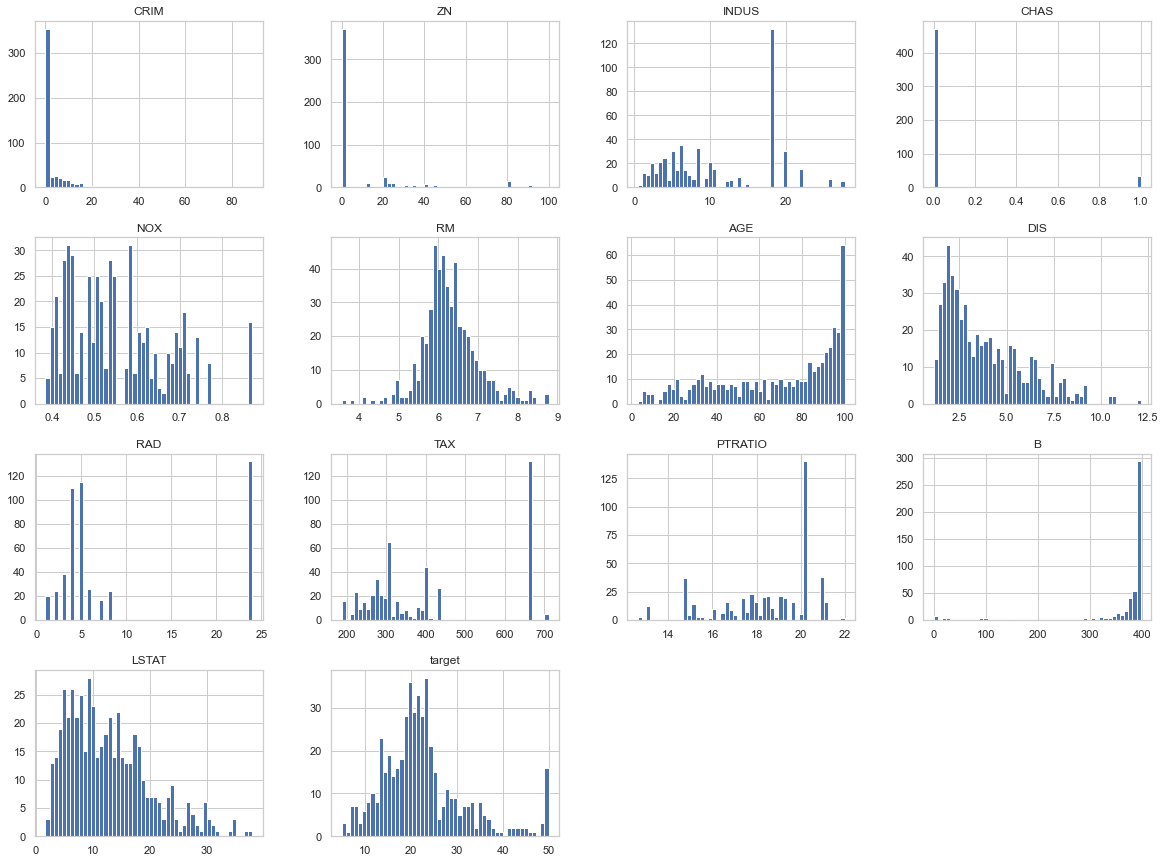

In [12]:
df.hist(bins = 50 , figsize=(20 ,15))
plt.show()

# Feature Selection for better Accuracy and Prediction

# 1. Using Pearson correlation for removing highly correlative features

In [13]:
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

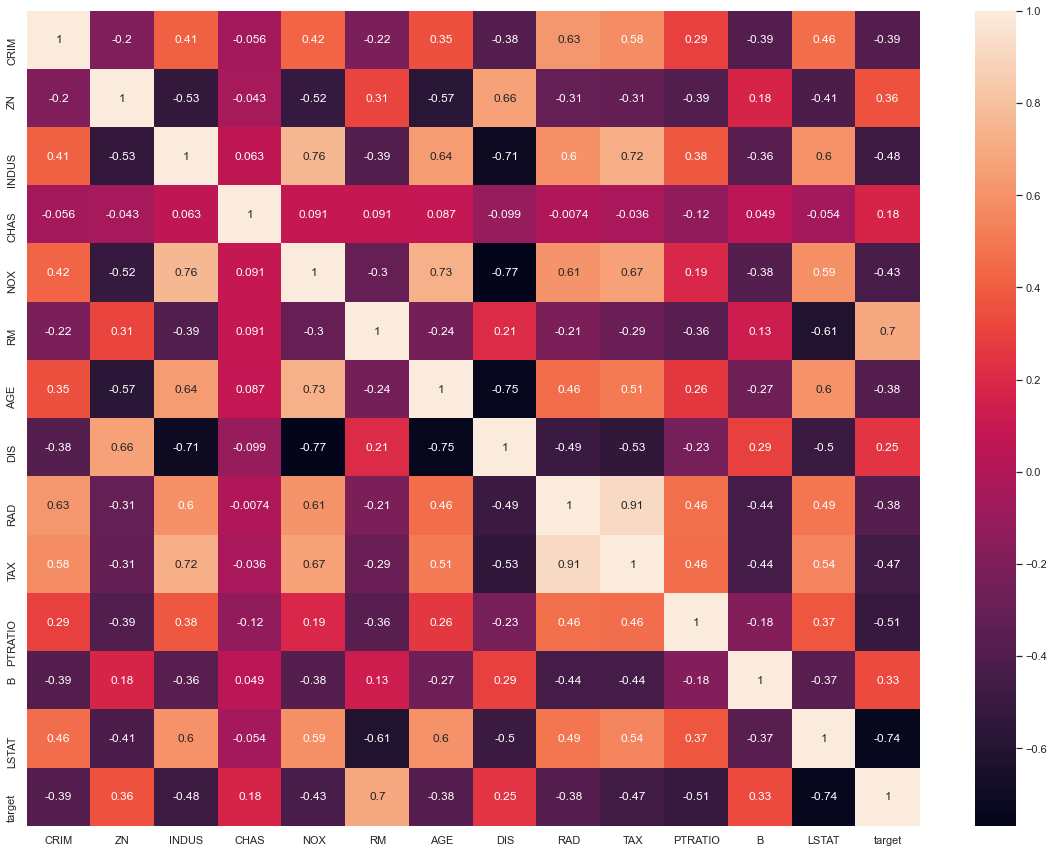

In [14]:
plt.figure(figsize = (20 , 15))
sns.heatmap(corr, annot=  True)

In [15]:
def correlation(data , threshold):
    corr = data.corr()
    feature_corr = set()
    for i in range(len(corr.columns)):
        
        for j in range(i):
            
            if(corr.iloc[i , j] > threshold):
                colname = corr.columns[i]
                feature_corr.add(colname)
    return feature_corr

In [16]:
correlative_features = correlation(df.drop(['target'] , axis = 1) , 0.8)
print(correlative_features)

{'TAX'}


In [17]:
df.drop(correlative_features , axis = 1, inplace = True)

In [18]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,21.0,393.45,6.48,22.0


In [19]:
df.shape

(506, 13)

# Split the data into train and test

In [20]:
X_train, X_test , Y_train , Y_test = model_selection.train_test_split(df.drop(['target'] , axis = 1), df['target'], test_size = 0.3 , random_state=0)

In [21]:
print(X_train.shape , X_test.shape)
print(Y_train.shape , Y_test.shape)

(354, 12) (152, 12)
(354,) (152,)


# Normalise the Data

In [22]:
x_train_mean = np.mean(X_train , axis= 0)
x_train_std = np.std(X_train, axis = 0)
X_train = (X_train - x_train_mean) / x_train_std

In [23]:
x_test_mean = np.mean(X_test , axis= 0)
x_test_std = np.std(X_test, axis = 0)
X_test = (X_test - x_test_mean) / x_test_std

In [24]:
ones = np.ones((X_train.shape[0] , 1))
X_train = np.hstack((ones, X_train))
X_train

array([[ 1.        , -0.20735619, -0.49997924, ...,  1.2272573 ,
         0.42454294,  3.10807269],
       [ 1.        , -0.38886492,  0.34677427, ...,  0.05696346,
         0.40185312, -0.66643035],
       [ 1.        , -0.33573486, -0.49997924, ...,  1.2272573 ,
         0.39846135,  0.63936662],
       ...,
       [ 1.        , -0.38450355, -0.49997924, ..., -0.30312696,
         0.39659002, -0.30284441],
       [ 1.        , -0.37511786, -0.49997924, ..., -0.25811566,
         0.37588849,  0.89967717],
       [ 1.        , -0.38592298, -0.49997924, ..., -0.84326258,
         0.42454294,  0.31822262]])

In [25]:
ones = np.ones((X_test.shape[0] , 1))
X_test = np.hstack((ones, X_test))
X_test

array([[ 1.        , -0.45379523, -0.45888196, ..., -0.74998219,
         0.26955997, -0.79993845],
       [ 1.        ,  0.55063352, -0.45888196, ...,  0.88492032,
         0.18133643, -0.49829647],
       [ 1.        , -0.44864325, -0.45888196, ..., -0.99769469,
         0.4499995 , -0.36469248],
       ...,
       [ 1.        ,  1.38129558, -0.45888196, ...,  0.88492032,
         0.48077063,  2.43272702],
       [ 1.        , -0.407137  , -0.45888196, ..., -0.00684469,
         0.48077063, -1.18559943],
       [ 1.        , -0.45789292, -0.45888196, ...,  0.14178281,
         0.45369983, -1.09331627]])

# Implement Linear Regression algorithm using Gradient Descent

In [26]:
def hypothesis(X, theta):
    return np.dot(X, theta)

In [27]:
def cost(X, Y, theta):
    y_predict = hypothesis(X, theta)
    m = X.shape[0]
    
    total_cost =  np.sum((Y - y_predict)**2)
    return total_cost/m

In [28]:
def gradient(X, Y, theta):
    m = X.shape[0]
    n = X.shape[1]
    grad = np.zeros((n, ))
    y_predict = hypothesis(X, theta)
    grad = np.dot(X.T , (y_predict - Y))
    return grad/m
    

In [29]:
def gradientDescent(X, Y, learning_rate = 0.1 , num_iterations = 200):
    n = X.shape[1]
    m = X.shape[0]
    theta = np.zeros((n , ))
    for i in range(num_iterations):
        grad = gradient(X, Y, theta)
        print(i , " Cost is : " , cost(X, Y, theta))
        theta = theta - (learning_rate * grad)
    return theta

In [30]:
def score(X, Y ,theta):
    y_predict = hypothesis(X, theta)
    num = np.sum((Y - y_predict)**2)
    deno = np.sum((Y - Y.mean())**2)
    return 1 - (num/deno)

In [31]:
theta = gradientDescent(X_train , Y_train )
theta

0  Cost is :  602.1213841807909
1  Cost is :  470.0220662224004
2  Cost is :  379.4778980087696
3  Cost is :  309.8533629361086
4  Cost is :  254.39175710275143
5  Cost is :  209.7680497362019
6  Cost is :  173.75917361823494
7  Cost is :  144.67249632784305
8  Cost is :  121.16554269514747
9  Cost is :  102.16104041586507
10  Cost is :  86.79155211041899
11  Cost is :  74.35777254717955
12  Cost is :  64.29561955211392
13  Cost is :  56.14991013049176
14  Cost is :  49.553218127735775
15  Cost is :  44.208868513145774
16  Cost is :  39.877248706288015
17  Cost is :  36.36478409850262
18  Cost is :  33.515055249113445
19  Cost is :  31.201637787935088
20  Cost is :  29.322328756123806
21  Cost is :  27.794489297144178
22  Cost is :  26.55128662809419
23  Cost is :  25.538660732178673
24  Cost is :  24.712875323547642
25  Cost is :  24.038540024472876
26  Cost is :  23.487012700361667
27  Cost is :  23.035108588900805
28  Cost is :  22.66405708953842
29  Cost is :  22.358658531489432
30

array([22.74548021, -0.9885998 ,  0.82695036, -0.48603943,  0.69322345,
       -1.86129034,  2.80386071, -0.35553194, -3.04754879,  0.69501232,
       -2.30772183,  0.59369517, -3.40381015])

In [32]:
c = theta[0]
m = theta[1:]

In [33]:
y_predict = hypothesis(X_test , theta)
y_predict

array([27.9841739 , 24.01121848, 29.39070235, 12.54939975, 22.79962025,
       19.72121539, 21.06417568, 21.06080819, 19.57796855, 21.72889551,
        7.13853545, 17.90317871, 17.72570535,  5.9815457 , 41.32922654,
       34.55483082, 22.98090413, 39.05121089, 32.13151121, 23.60730019,
       25.19208747, 25.56505789, 21.66410988, 30.72495605, 22.79593141,
       10.51975078, 17.95731843, 19.4366887 , 37.02188778, 22.52500696,
       18.79139889, 18.21825406, 20.29910163, 24.59664502, 29.93314139,
       19.89346692, 11.90190334, 25.1154227 , 18.87846599, 16.24614601,
       26.88908629, 21.36921582, 25.26652439, 15.92155473, 26.36985257,
       25.57752753, 20.49734387, 24.27855173, 10.98981406, 25.44693146,
       23.01384383, 18.88292528, 24.85466276, 31.33435798, 14.30853277,
       22.8825721 , 22.26720577, 17.29982845, 15.46535733, 22.46969534,
       19.91307212, 22.2684331 , 34.05713289, 31.85730199, 18.36322758,
       34.99939036, 19.33206605, 20.67041712, 20.23694346, 23.42

In [34]:
test_score = score(X_test, Y_test, theta)
test_score

0.6499222161345769

In [35]:
train_score = score(X_train , Y_train , theta)
train_score

0.7598799888270971

# Using sklearn Library

In [36]:
algo = LinearRegression()
algo.fit(X_train, Y_train)

LinearRegression()

In [37]:
y_sklearn_predict = algo.predict(X_test)
y_sklearn_predict

array([27.95957726, 24.10233918, 29.40465022, 12.55997901, 22.82288711,
       19.66338401, 21.11843465, 21.0175886 , 19.60964806, 21.7522114 ,
        7.07109404, 17.98014009, 17.68714609,  6.00818627, 41.32463205,
       34.56194704, 23.06443975, 39.09210044, 32.14156238, 23.60625377,
       25.16590989, 25.61783459, 21.69799732, 30.77875054, 22.80503631,
       10.68197578, 17.92322912, 19.29744859, 37.02060701, 22.56558362,
       18.8503606 , 18.1856563 , 20.27723836, 24.6418751 , 29.99247063,
       19.8430194 , 11.8834092 , 25.17181067, 18.96548446, 16.32893543,
       26.90535839, 21.36764652, 25.23812819, 16.0287319 , 26.28020001,
       25.57682443, 20.51903377, 24.10504586, 10.85961293, 25.44363051,
       22.83468746, 18.83754887, 24.90031973, 31.17241439, 14.28303342,
       22.85581436, 22.2602986 , 17.22027998, 15.5377763 , 22.49085796,
       19.82205432, 22.23278713, 34.08366028, 31.86991382, 18.41983205,
       35.07765395, 19.29752258, 20.63196509, 20.3053192 , 23.42

In [38]:
m_ = algo.coef_
c_ = algo.intercept_
print(m_ ,c_)

[ 0.         -1.00339647  0.84620596 -0.47633416  0.68952005 -1.95681076
  2.77823486 -0.33501961 -3.11046803  0.74067901 -2.3275525   0.59015227
 -3.41575637] 22.7454802259887


In [39]:
train_score_ = algo.score(X_train, Y_train)
train_score_

0.7599126713257587

In [40]:
test_score_ = algo.score(X_test , Y_test)
test_score_

0.6506382643696302